### Read data

In [34]:
from obspy import read    #https://docs.obspy.org/tutorial/index.html

from matplotlib import pyplot as plt
import numpy as np
import os

In [35]:
plt.rcParams['figure.figsize'] = (12, 6)

In [36]:
path = '/home/pant/Desktop/helix/notebooks/seism/earthquake_data' #change this!
dirs = {}
for r_, d_, f_ in os.walk(path):
    if r_ not in dirs:
        dirs[r_] = []
        for file in f_:
            if '.sac' in file:
                dirs[r_].append(file)

In [37]:
sacs = {}
for dir_ in dirs:
    if len(dirs[dir_]) == 0:
        continue
    dir_name = dir_.split(os.sep)[-1]
    sacs[dir_name] = []
    for file in dirs[dir_]:
        sacs[dir_name].append(read(dir_+os.sep+file)[0])
        

### Select two .sac, do some exploration

In [38]:
list(sacs.keys())

['20170712_170950',
 '201909_140424',
 '20170612_122838',
 '20190719_111315',
 '20181025_225449']

In [39]:
event = list(sacs.keys())[1]
sac1 = sacs[event][0]
sac2 = sacs[event][1]

In [40]:
print(sac1.stats)
print(sac2.stats)

         network: HL
         station: SMSN
        location: 01
         channel: BHZ
       starttime: 2019-09-21T14:02:24.009072Z
         endtime: 2019-09-21T15:04:24.014604Z
   sampling_rate: 18.768789291381836
           delta: 0.053279941741323465
            npts: 69821
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.05327994, 'depmin': -121.0, 'depmax': 103.0, 'scale': 1.0, 'b': 7.2000003e-05, 'e': 3720.0054, 'depmen': -0.49732888, 'nzyear': 2019, 'nzjday': 264, 'nzhour': 14, 'nzmin': 2, 'nzsec': 24, 'nzmsec': 9, 'nvhdr': 6, 'npts': 69821, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'SMSN', 'khole': '01', 'kcmpnm': 'BHZ', 'knetwk': 'HL'})
         network: HL
         station: SSEA
        location: 01
         channel: BHZ
       starttime: 2019-09-21T14:02:23.983409Z
         endtime: 2019-09-21T15:04:23.985657Z
   sampling_rate: 18.7674617767334
           delta: 0.05328371049300502
            n

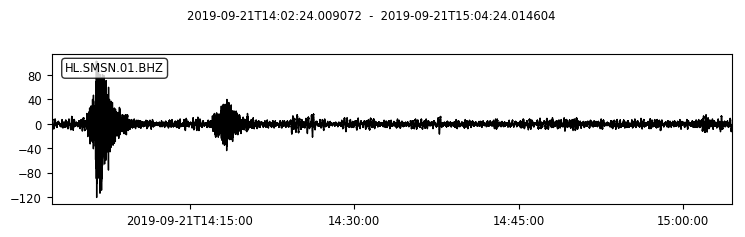

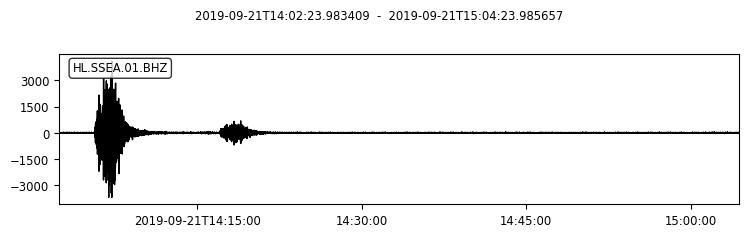

In [41]:
_ = sac1.plot()
_ = sac2.plot()

In [42]:
data1 = sac1.data       
times1 = sac1.times()  

data2 = sac2.data       
times2 = sac2.times() 

Text(0.5, 0, 'secs')

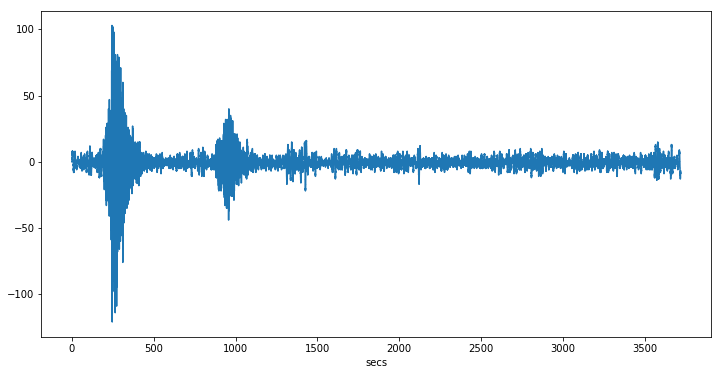

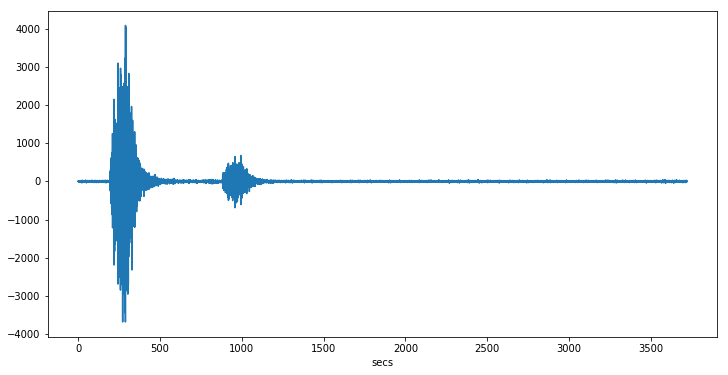

In [43]:
plt.plot(times1,data1)
plt.xlabel('secs')

plt.figure()
plt.plot(times2,data2)
plt.xlabel('secs')

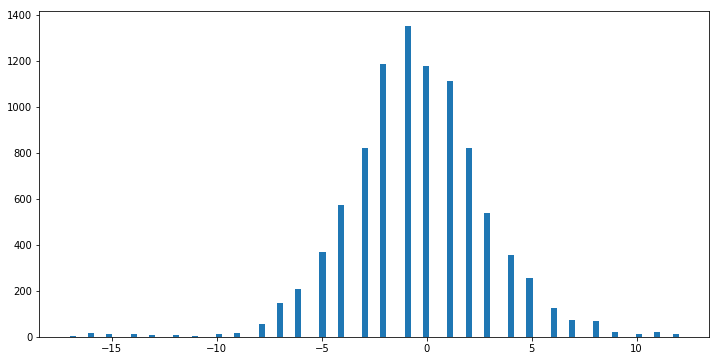

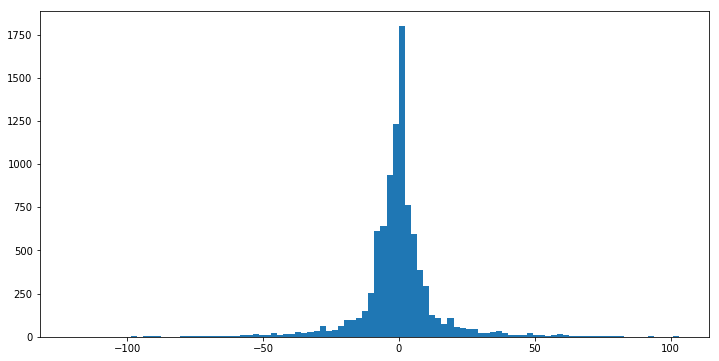

In [44]:
per0 = data1[(times1>2000) * (times1<2500)]
per1 = data1[(times1>0) * (times1<500)]

_ = plt.hist(per0,100)
plt.figure()
_ = plt.hist(per1,100)

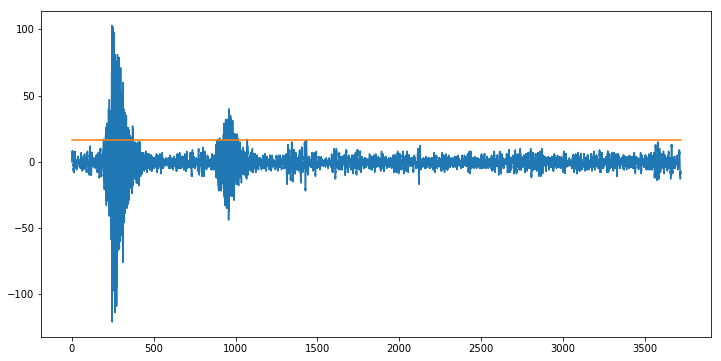

In [45]:
thresh = np.mean(per0) + 5*np.std(per0)
plt.plot(times1,data1)
plt.plot([min(times1),max(times1)],[thresh,thresh])